<a href="https://colab.research.google.com/github/N3wBaz/mlops-zoomcamp/blob/main/01-intro/homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download datasets to google colab 
# !wget https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet

In [2]:
# !wget https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet

In [6]:
# mount google drive

from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

Read data from google disk. You should write path to your data

In [152]:
df_t = pd.read_parquet("/content/gdrive/MyDrive/DataTalksClub/MLOps_course/1_st_homework/fhv_tripdata_2021-01.parquet")

In [153]:
df_v = pd.read_parquet("/content/gdrive/MyDrive/DataTalksClub/MLOps_course/1_st_homework/fhv_tripdata_2021-02.parquet")

In [154]:
df_t.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
dtype: object

**Q1. Downloading the data**

*   Read the data for January. How many records are there?




In [155]:
print(f"The number of records in Januaty is {df_t.shape[0]}")

The number of records in Januaty is 1154112


**Q2. Computing duration**

*   What's the average trip duration in January?

In [156]:
df_t['duration'] = df_t.dropOff_datetime - df_t.pickup_datetime 
df_t.duration = df_t.duration.dt.total_seconds() / 60

df_v['duration'] = df_v.dropOff_datetime - df_v.pickup_datetime 
df_v.duration = df_v.duration.dt.total_seconds() / 60


In [157]:
print(f"Average trip duration in January is {df_t['duration'].mean()}")

Average trip duration in January is 19.1672240937939


Checking out data for outliers. Let's draw a boxplot for our target values


In [158]:
df_t.duration.describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.96, 0.97, 0.98, 0.99])

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
95%      4.725000e+01
96%      5.146667e+01
97%      5.775000e+01
98%      6.613333e+01
99%      9.030000e+01
max      4.233710e+05
Name: duration, dtype: float64

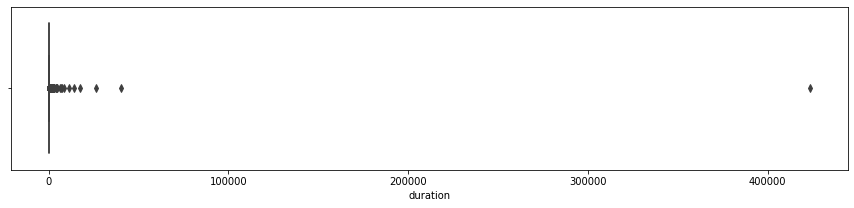

In [159]:
fig = plt.figure(figsize=(15,3))
ax = sns.boxplot(x=df_t["duration"])

We can see, that most of the data is within aprox. 1 hour (perc = 97% --> aprox. 58 minutes). We can use data with durations within this range.

**Flitering data from some outliers**

In [160]:
df_t = df_t[(df_t.duration <= 58)].copy()
df_v = df_v[(df_v.duration <= 58)].copy()

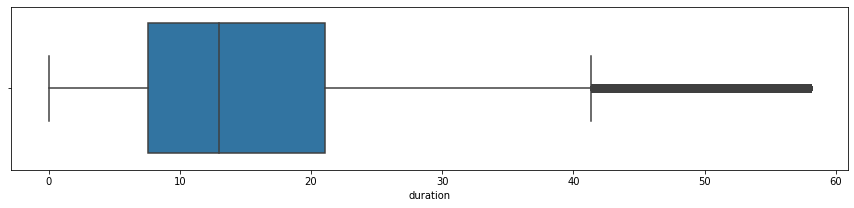

In [139]:
fig = plt.figure(figsize=(15, 3))
ax = sns.boxplot(x=df_t["duration"])

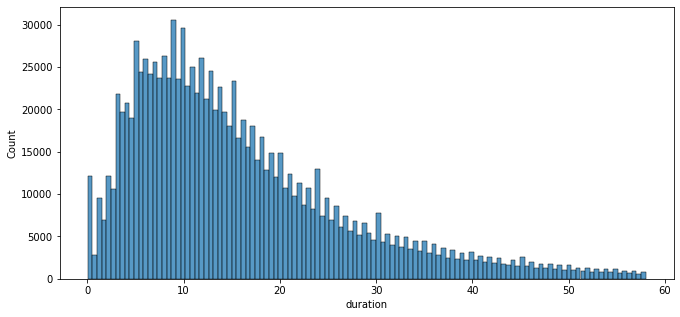

In [161]:
# Target values
fig = plt.figure(figsize=(11,5))
sns.histplot(df_t.duration, bins=120);

**Q3. Missing values**

*   What's the fractions of missing values for the pickup location ID?

In [162]:
print(f"Fractions of missing values for the pickup location ID is {df_t['PUlocationID'].isnull().sum() / df_t.shape[0] * 100}%")

Fractions of missing values for the pickup location ID is 83.29216020113083%


In [163]:
df_t.fillna(-1, inplace=True)
df_v.fillna(-1, inplace=True)

In [164]:
df_t.isnull().sum()

dispatching_base_num      0
pickup_datetime           0
dropOff_datetime          0
PUlocationID              0
DOlocationID              0
SR_Flag                   0
Affiliated_base_number    0
duration                  0
dtype: int64

In [165]:
categorical = ['PUlocationID', 'DOlocationID']
df_t[categorical] = df_t[categorical].astype(str)
train_dicts = df_t[categorical].to_dict(orient='records')

df_v[categorical] = df_v[categorical].astype(str)
val_dicts = df_v[categorical].to_dict(orient='records')



In [167]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

**Q4. One-hot encoding**

*    Let's apply one-hot encoding to the pickup and dropoff location IDs.
     
     What's the dimensionality of this matrix? (The number of columns).


In [168]:
print(f"The dimensionality of this matrix is {X_train.shape[1]}")

The dimensionality of this matrix is 525


In [170]:
target = 'duration'
y_train = df_t[target].values
y_val = df_v[target].values

**Q5. Training a model**

*   What's the RMSE on train?

In [171]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

print(f"RMSE on train is {mean_squared_error(y_train, y_pred, squared=False)}")

RMSE on train is 10.340573366416262


**Q6. Evaluating the model**

*   What's the RMSE on validation?

In [172]:
y_pred_v = lr.predict(X_val)
print(f"RMSE on validation is {mean_squared_error(y_val, y_pred_v, squared=False)}")

RMSE on train is 10.826866242870722
